<a href="https://colab.research.google.com/github/ranjithtg-omr/AI_ML_RANJITH/blob/main/Assignment_on_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Cleaning**

In [ ]:
import pandas as pd

In [ ]:
filepath="/content/Loan.csv"
df = pd.read_csv('Loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
# Drop unnecessary column
df = df.drop('Loan_ID', axis=1)

In [ ]:
# Map target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [ ]:
# Encode categorical variables
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Explanation

Missing Values: Filled categorical features with mode and numerical features (LoanAmount, Loan_Amount_Term) with median. Credit_History (0/1) filled with mode (1).
Encoding: Used one-hot encoding for categorical variables to prepare for modeling. Target 'Loan_Status' mapped to 1 (Y) and 0 (N).
After cleaning, no missing values remain. Dataset shape: (614, 15).

**2. EDA (Exploratory Data Analysis)**

In [ ]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Loan_Status  
count      614.000000   614.000000  
mean         0.855049     0.687296  
std          0.352339     0.463973  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     1.000000  
75%          1.000000     1.000000  
max          1.000000     1.

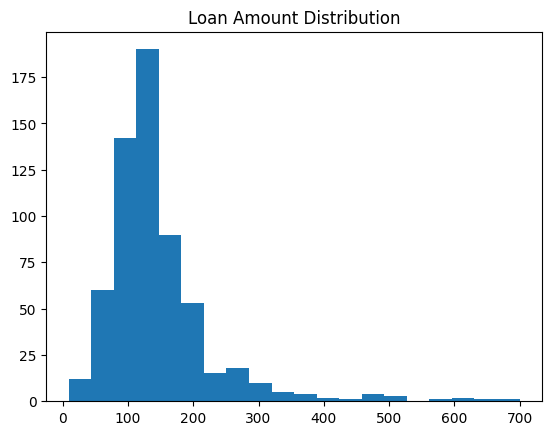

In [ ]:
#Visualizations
import matplotlib.pyplot as plt

# Distribution of LoanAmount
plt.hist(df['LoanAmount'], bins=20)
plt.title('Loan Amount Distribution')
plt.show()
## Description: Right-skewed, most loans between 100-200.

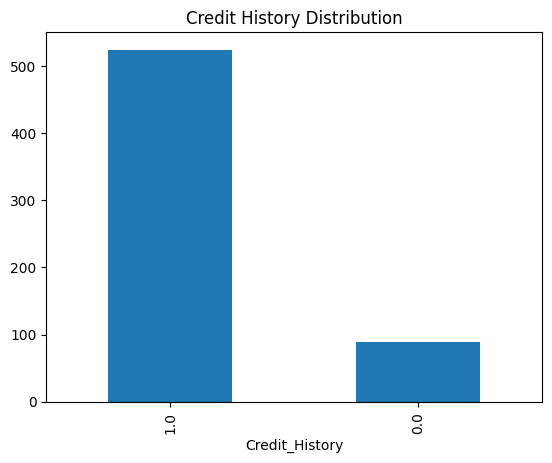

In [ ]:
# Bar plot for Credit_History
df['Credit_History'].value_counts().plot(kind='bar')
plt.title('Credit History Distribution')
plt.show()
# Description: Majority (525) have credit history=1, minority (89) have 0.

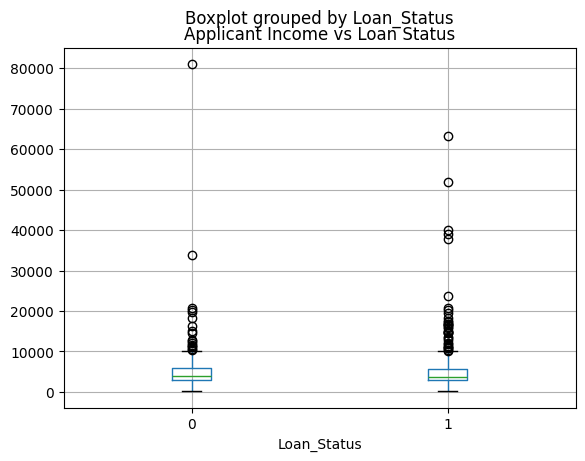

In [ ]:
# Approval rate vs. features (e.g., boxplot for income vs status)
df.boxplot(column='ApplicantIncome', by='Loan_Status')
plt.title('Applicant Income vs Loan Status')
plt.show()
# Description: Similar medians, but approved have more outliers in high income.

In [ ]:
#Correlation and Feature Importance
print(df.corr()['Loan_Status'].sort_values(ascending=False))

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education_Not Graduate    -0.085884
Name: Loan_Status, dtype: float64


Key Insights:

Credit_History (0.54): Strongest positive correlation.
Property_Area_Semiurban (0.14): Higher approval in semiurban areas.
Married_Yes (0.09): Married applicants slightly higher approval.
Education_Not Graduate (-0.09): Graduates have higher approval.
Negative correlations for LoanAmount, CoapplicantIncome (minor).

**Approval Rates vs. Features**

In [ ]:
print(df.groupby('Credit_History')['Loan_Status'].mean())
print(df.groupby('Property_Area_Semiurban')['Loan_Status'].mean())
print(df.groupby('Married_Yes')['Loan_Status'].mean())

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64
Property_Area_Semiurban
False    0.637795
True     0.768240
Name: Loan_Status, dtype: float64
Married_Yes
False    0.629108
True     0.718204
Name: Loan_Status, dtype: float64


Insights: Credit history is crucial for approval. Semiurban properties and married applicants have higher rates. Income distributions are suddenly changed, suggesting potential log transformation if needed, but not applied here.

**3. Modeling**

**Data Preparation for Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Shape of X (features):", X.shape)
print("\nColumns in X:")
print(X.columns.tolist())
print("\nFirst 3 rows of X (preview):")
print(X.head(3))

Shape of X (features): (614, 14)

Columns in X:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']

First 3 rows of X (preview):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True        False         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0   

**Building Models**

5 models: Logistic Regression, KNN, SVM, Decision Tree, Random Forest.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

**4. Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name}:')
    print('Confusion Matrix:\n', cm)
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1-Score: {f1:.4f}\n')

for name, model in models.items():
    evaluate_model(model, name)

Logistic Regression:
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1-Score: 0.8587

KNN:
Confusion Matrix:
 [[17 26]
 [ 3 77]]
Accuracy: 0.7642
Precision: 0.7476
Recall: 0.9625
F1-Score: 0.8415

SVM:
Confusion Matrix:
 [[18 25]
 [ 0 80]]
Accuracy: 0.7967
Precision: 0.7619
Recall: 1.0000
F1-Score: 0.8649

Decision Tree:
Confusion Matrix:
 [[20 23]
 [17 63]]
Accuracy: 0.6748
Precision: 0.7326
Recall: 0.7875
F1-Score: 0.7590

Random Forest:
Confusion Matrix:
 [[18 25]
 [ 2 78]]
Accuracy: 0.7805
Precision: 0.7573
Recall: 0.9750
F1-Score: 0.8525

